In [ ]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
path = kagglehub.dataset_download("minasameh55/king-country-houses-aa")

# Use the correct file name from the output of os.listdir(path)
file_name = "king_ country_ houses_aa.csv"  # Correct filename from the directory
file_path = os.path.join(path, file_name)

df = pd.read_csv(file_path)

df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
0


In [ ]:
print(df.eq(" ").sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


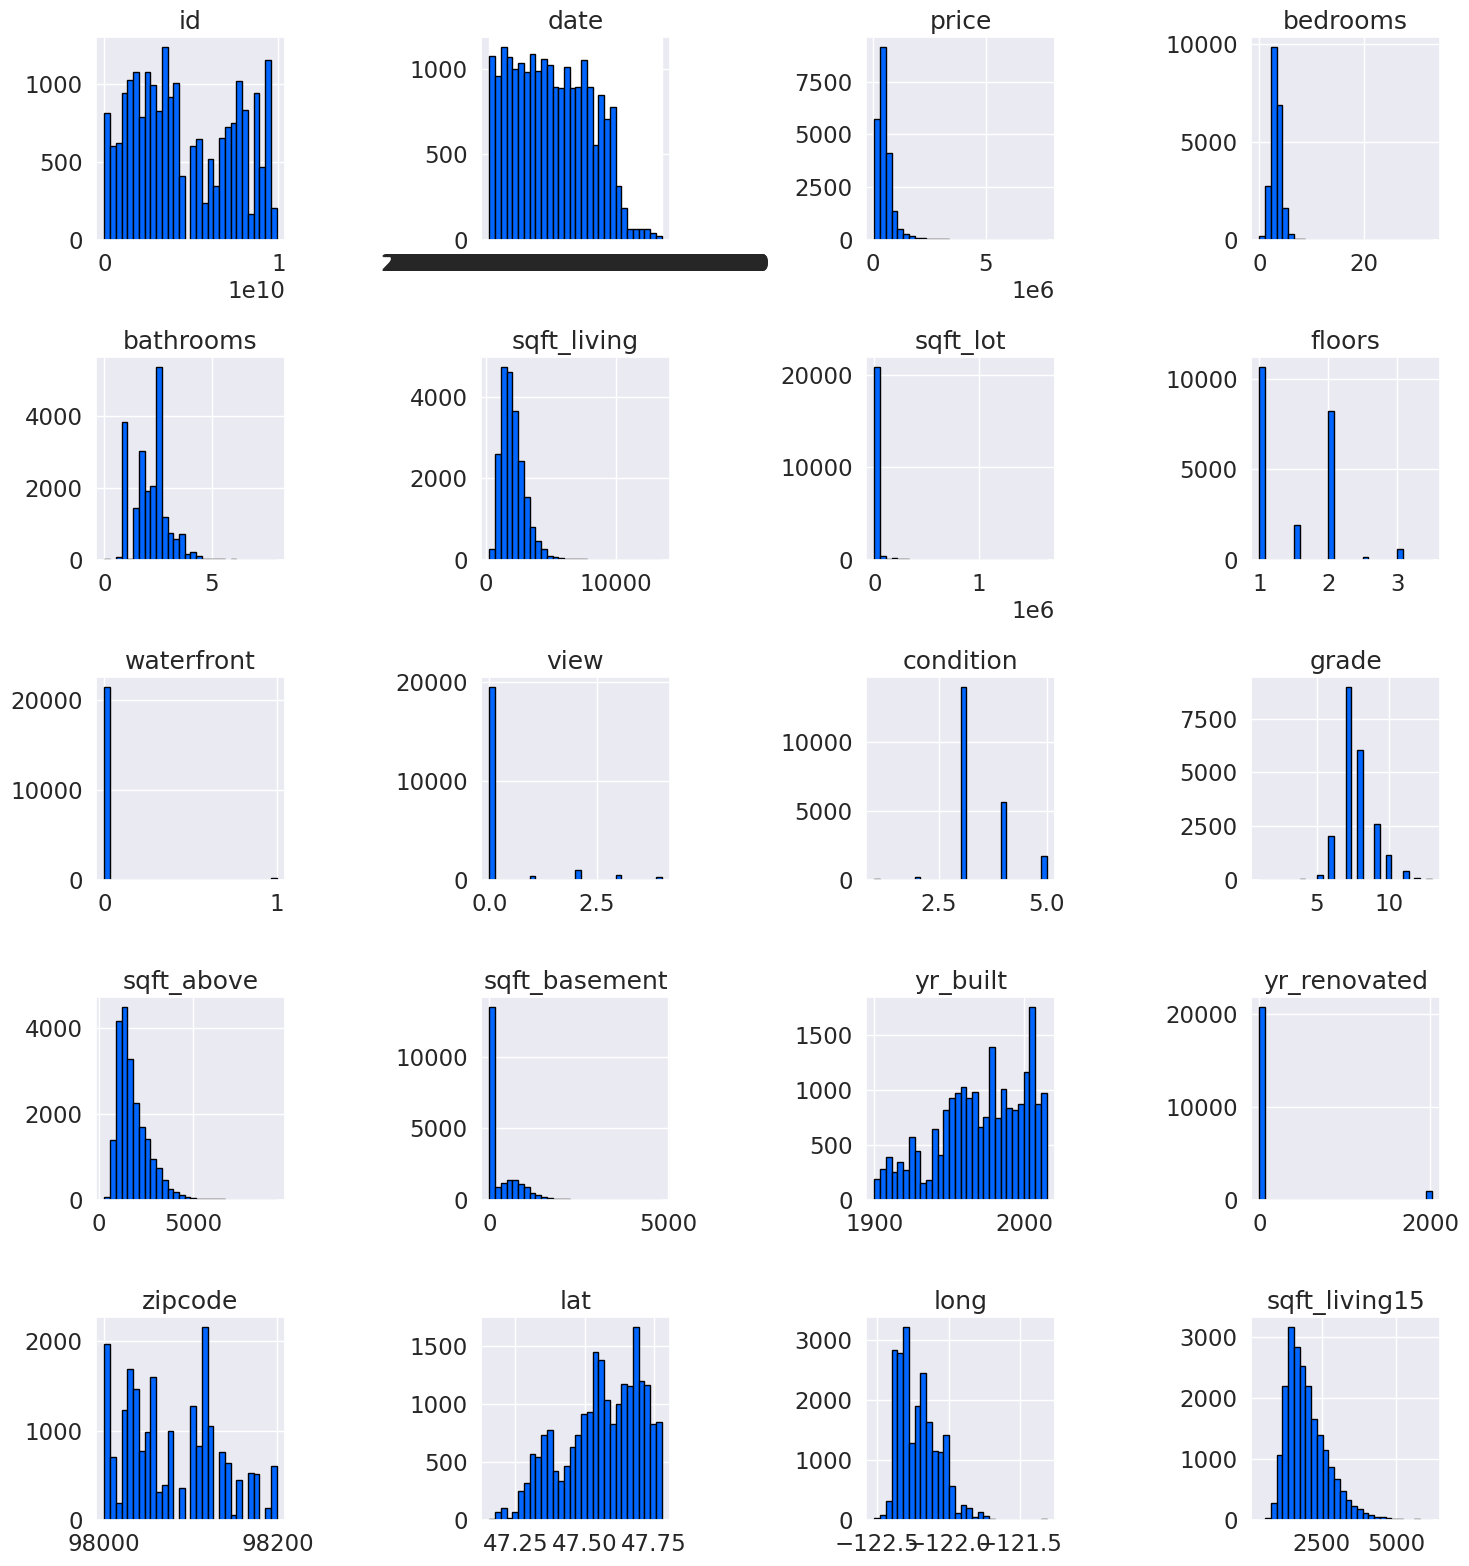

In [ ]:
color = '#0066FF'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

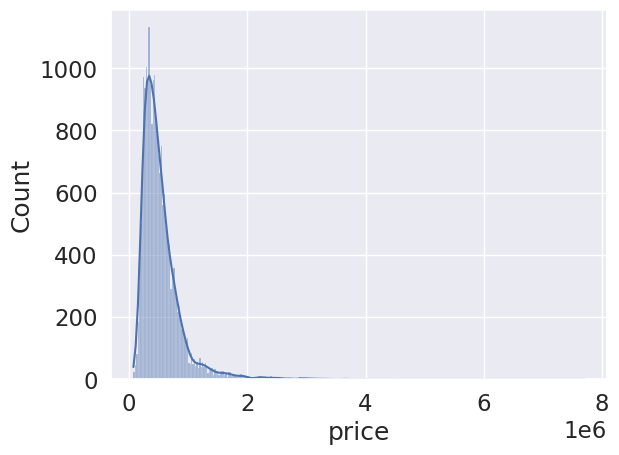

In [ ]:
sns.histplot(df["price"], kde=True);

In [ ]:
df = df.drop(["date"], axis=1)
df.corrwith(df["price"]).sort_values(ascending=False)

,0
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


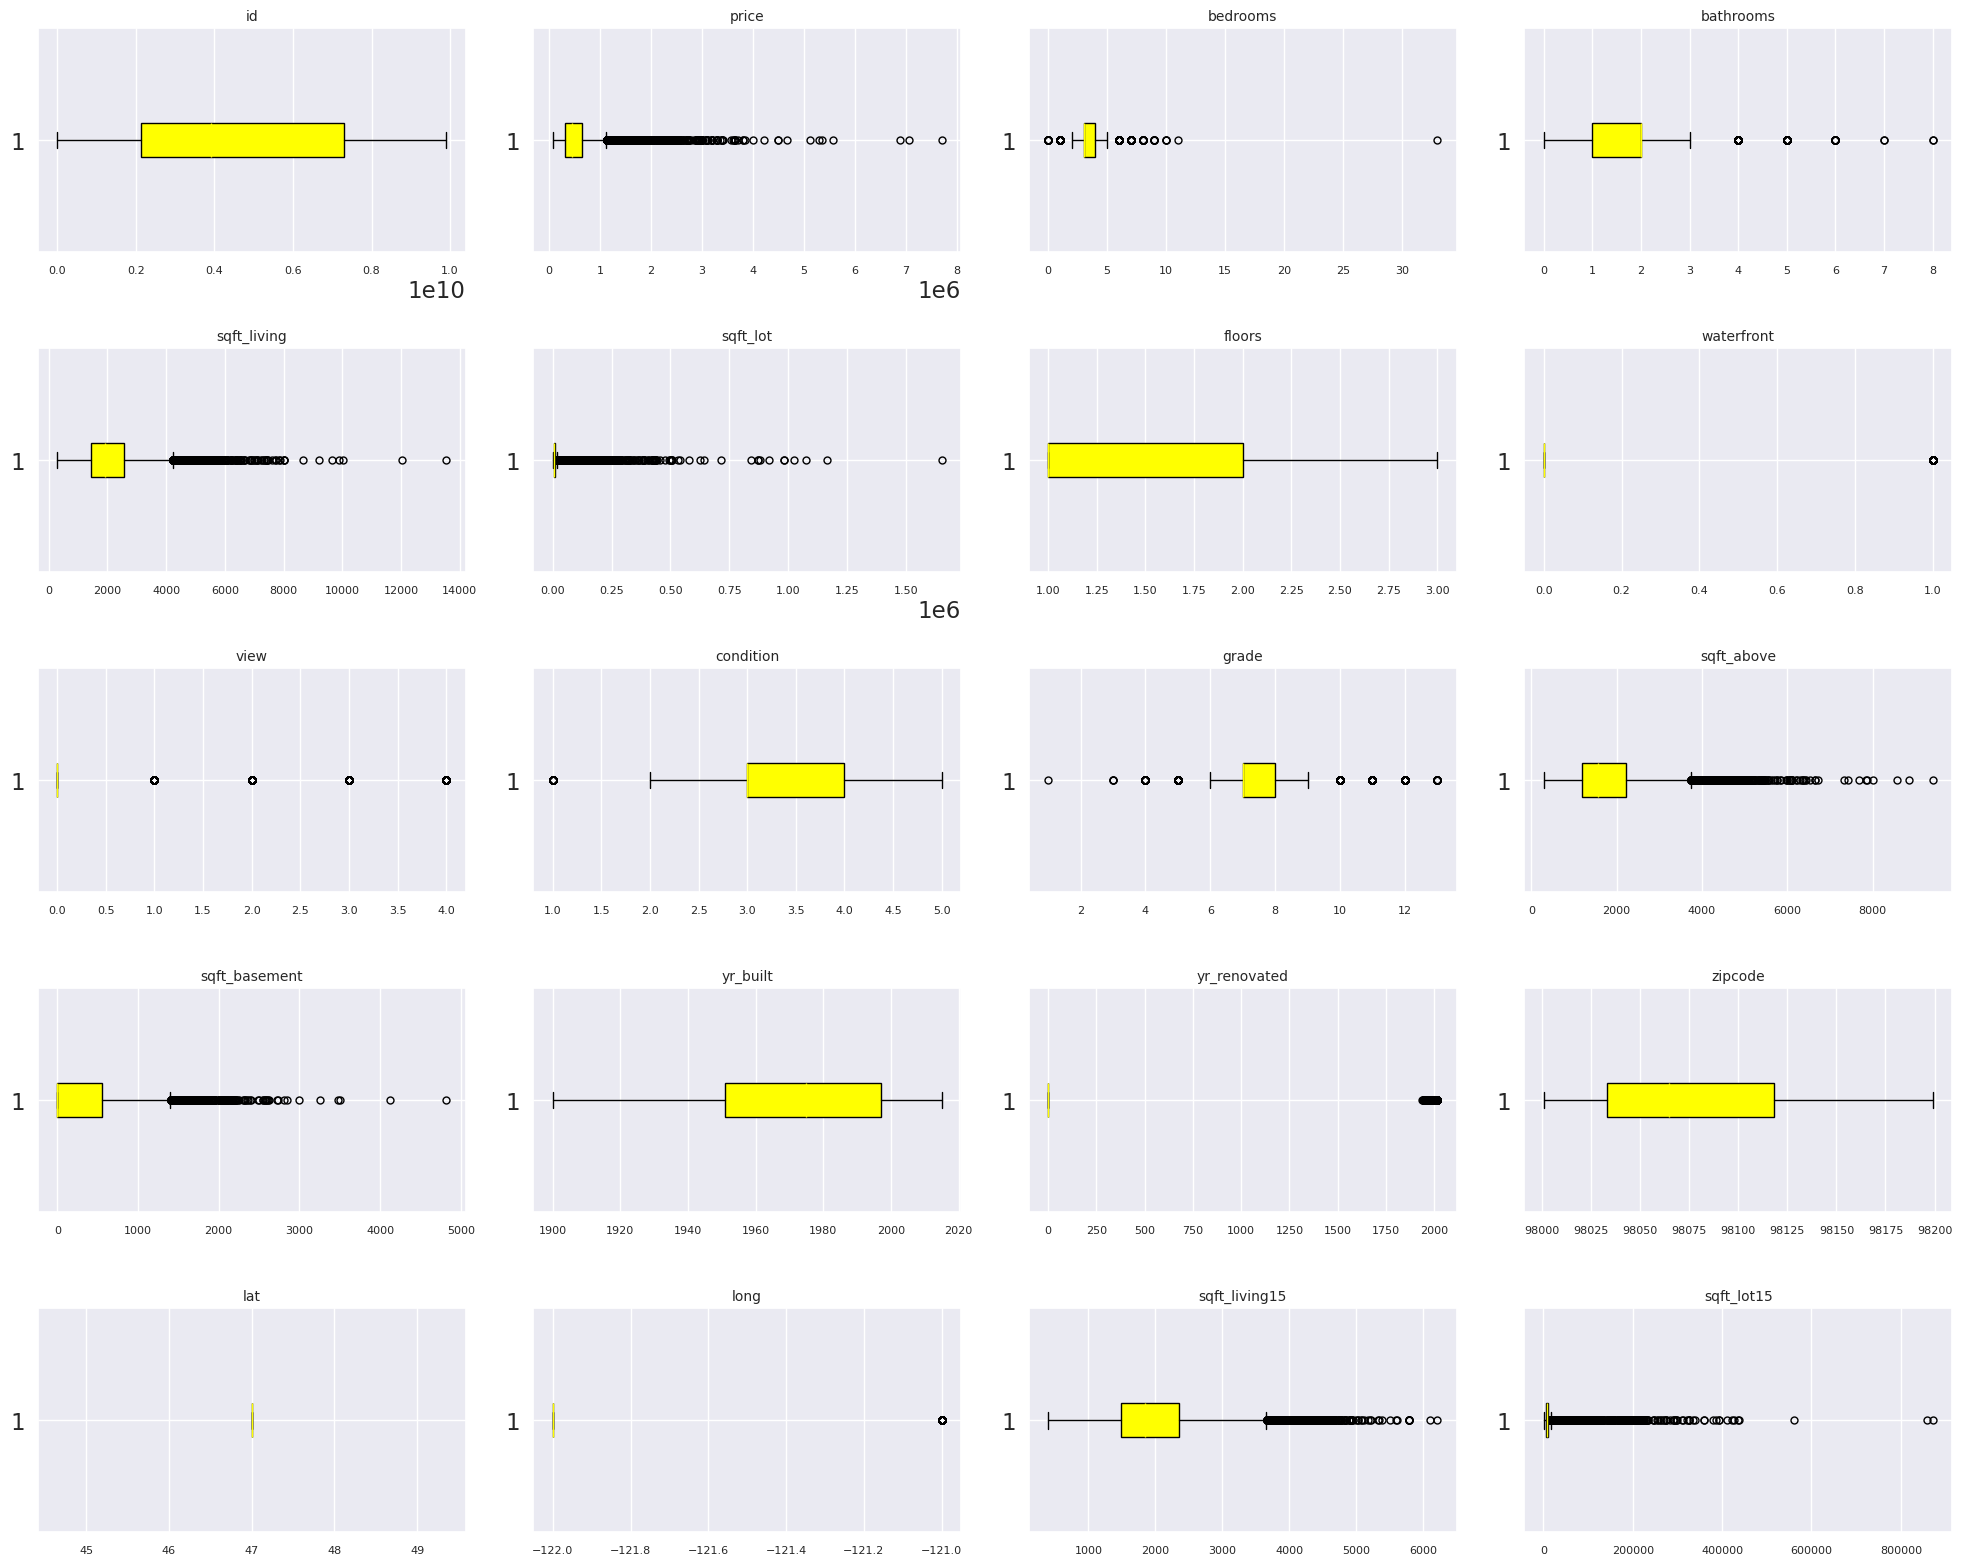

In [ ]:
color = '#FFFF00'

# grid size
nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna().astype(int), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [ ]:
price = df.pop("price")
df["price"] = price

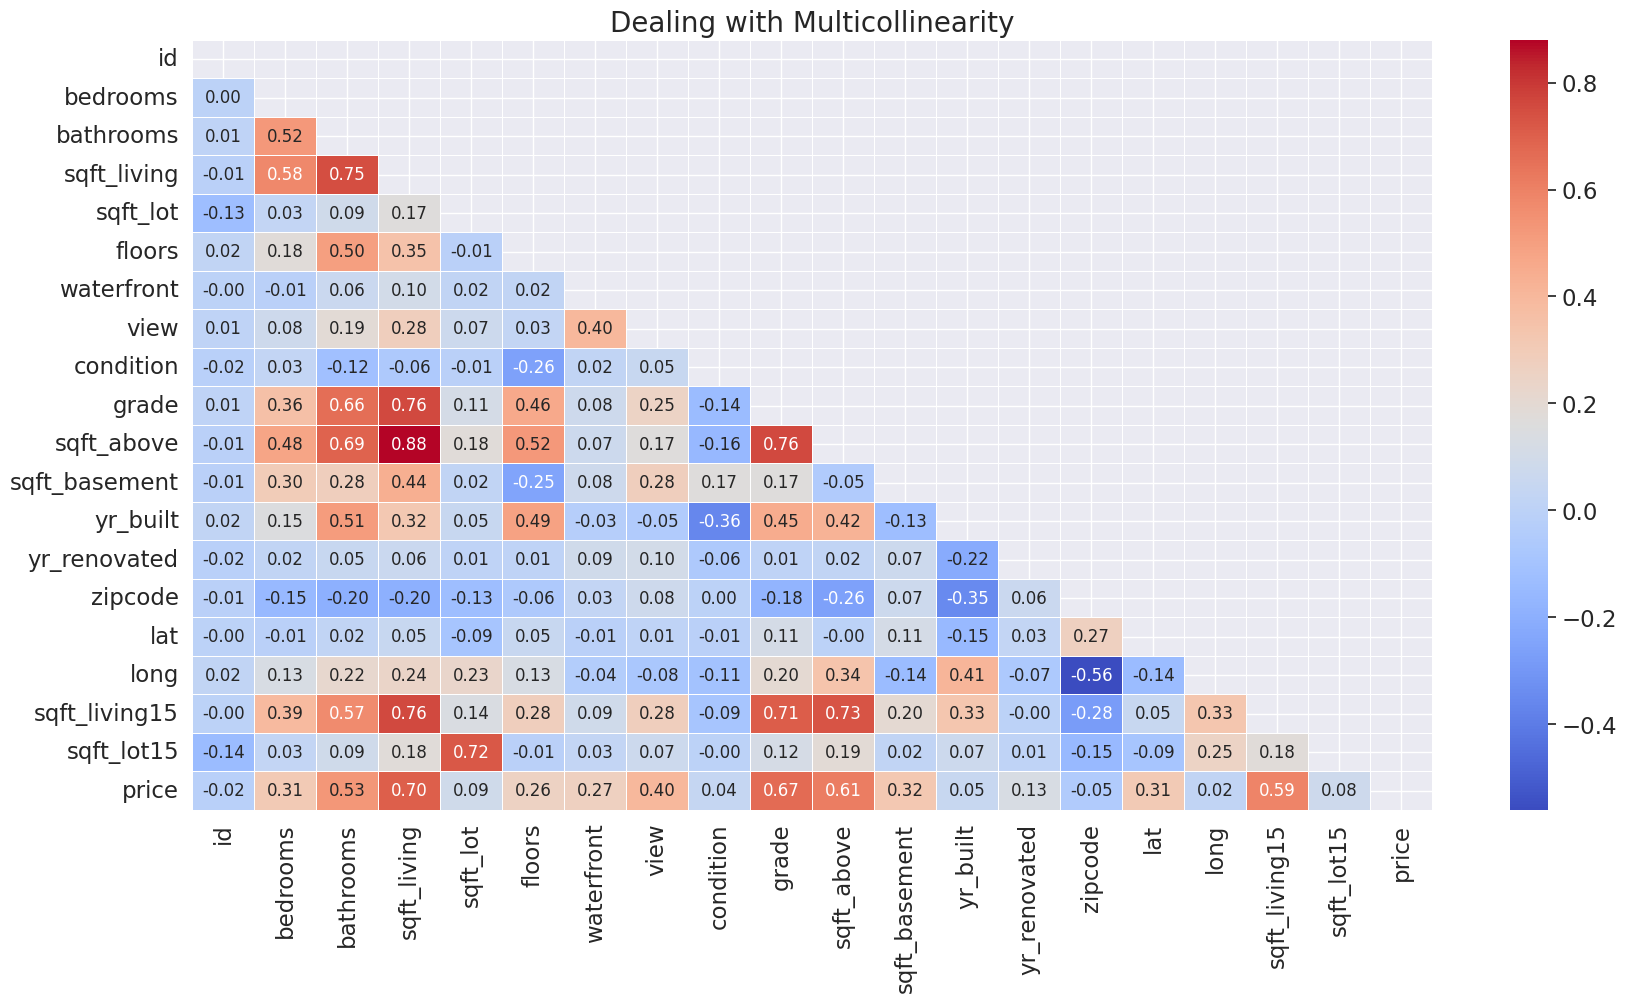

In [ ]:
num_corr = round(df.corr(), 2)

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

# Making the machine learn

In [ ]:
def get_normalized_X(df):
  df = df.drop("price", axis=1)

  scaler = MinMaxScaler()
  X_norm = df.astype(int).copy()

  scaler.fit(X_norm)

  X_norm = pd.DataFrame(scaler.transform(X_norm), columns=X_norm.columns)
  print(X_norm.head(5))

  return X_norm


X -> original data

X_norm -> normalized data

y -> target (price)


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def linear_regression_model(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  print(f'100% of our data: {len(X)}.')
  print(f'70% for training data: {len(X_train)}.')
  print(f'30% for test data: {len(X_test)}.')

  model = LinearRegression()
  model.fit(X_train,y_train)

  predictions = model.predict(X_test)

  r2 = r2_score(y_test, predictions)
  RMSE = mean_squared_error(y_test, predictions,squared=False)
  MSE = mean_squared_error(y_test, predictions)
  MAE = mean_absolute_error(y_test, predictions)

  #Printing the results
  print("R2 = ", round(r2, 4))
  print("RMSE = ", round(RMSE, 4))
  print("MSE =  ", round(MSE, 4))
  print("MAE = ", round(MAE, 4))

  return [r2, RMSE, MSE, MAE]

def ridge_model(X, y): #changed nothing here - should I have? @Edu
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  print(f'100% of our data: {len(X)}.')
  print(f'70% for training data: {len(X_train)}.')
  print(f'30% for test data: {len(X_test)}.')

  ridge = Ridge()
  ridge.fit(X_train, y_train)

  predictions = ridge.predict(X_test)

  r2 = r2_score(y_test, predictions)
  RMSE = mean_squared_error(y_test, predictions,squared=False)
  MSE = mean_squared_error(y_test, predictions)
  MAE = mean_absolute_error(y_test, predictions)

  #Printing the results
  print("R2 = ", round(r2, 4))
  print("RMSE = ", round(RMSE, 4))
  print("MSE =  ", round(MSE, 4))
  print("MAE = ", round(MAE, 4))

  return [r2, RMSE, MSE, MAE]


def lasso_model(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  print(f'100% of our data: {len(X)}.')
  print(f'70% for training data: {len(X_train)}.')
  print(f'30% for test data: {len(X_test)}.')

  lasso = Lasso()
  lasso.fit(X_train, y_train)

  predictions = lasso.predict(X_test)

  r2 = r2_score(y_test, predictions)
  RMSE = mean_squared_error(y_test, predictions,squared=False)
  MSE = mean_squared_error(y_test, predictions)
  MAE = mean_absolute_error(y_test, predictions)

  #Printing the results
  print("R2 = ", round(r2, 4))
  print("RMSE = ", round(RMSE, 4))
  print("MSE =  ", round(MSE, 4))
  print("MAE = ", round(MAE, 4))

  return [r2, RMSE, MSE, MAE]

def decision_tree_model(X, y, test_size=0.3):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    print(f'100% of our data: {len(X)}.')
    print(f'{(1 - test_size) * 100}% for training data: {len(X_train)}.')
    print(f'{test_size * 100}% for test data: {len(X_test)}.')

    tree = DecisionTreeRegressor()
    tree.fit(X_train, y_train)

    predictions = tree.predict(X_test)

    r2 = r2_score(y_test, predictions)
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)

    print("R2 = ", round(r2, 4))
    print("RMSE = ", round(RMSE, 4))
    print("MSE =  ", round(MSE, 4))
    print("MAE = ", round(MAE, 4))

    return [r2, RMSE, MSE, MAE]

## Linear Regression


In [ ]:

df_reg = df.copy()

for col in df.columns:
  n = len(df[col].value_counts().unique())
  print(col, n)
  if n < 30:
    df_reg = df_reg.drop(col, axis=1)

df_reg = df_reg.drop("zipcode", axis=1)
df_reg = df_reg.drop("long", axis=1)
df_reg = df_reg.drop("sqft_above", axis=1)
df_reg = df_reg.drop("sqft_living15", axis=1)
df_reg = df_reg.drop("sqft_lot15", axis=1)
df_reg.head()


id 3
bedrooms 11
bathrooms 24
sqft_living 122
sqft_lot 68
floors 6
waterfront 2
view 5
condition 5
grade 12
sqft_above 144
sqft_basement 86
yr_built 100
yr_renovated 26
zipcode 66
lat 17
long 101
sqft_living15 133
sqft_lot15 74
price 107


,sqft_living,sqft_lot,sqft_basement,yr_built,price
0,1180,5650,0,1955,221900.0
1,2570,7242,400,1951,538000.0
2,770,10000,0,1933,180000.0
3,1960,5000,910,1965,604000.0
4,1680,8080,0,1987,510000.0


In [ ]:
def remove_outliers(df,col):

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  # Compute IQR
  IQR = Q3 - Q1

  # Define bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Filter the dataframe
  return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


for col in df_reg.columns:
  df_reg = remove_outliers(df_reg,col)

df_reg.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17743 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    17743 non-null  int64  
 1   sqft_lot       17743 non-null  int64  
 2   sqft_basement  17743 non-null  int64  
 3   yr_built       17743 non-null  int64  
 4   price          17743 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 831.7 KB


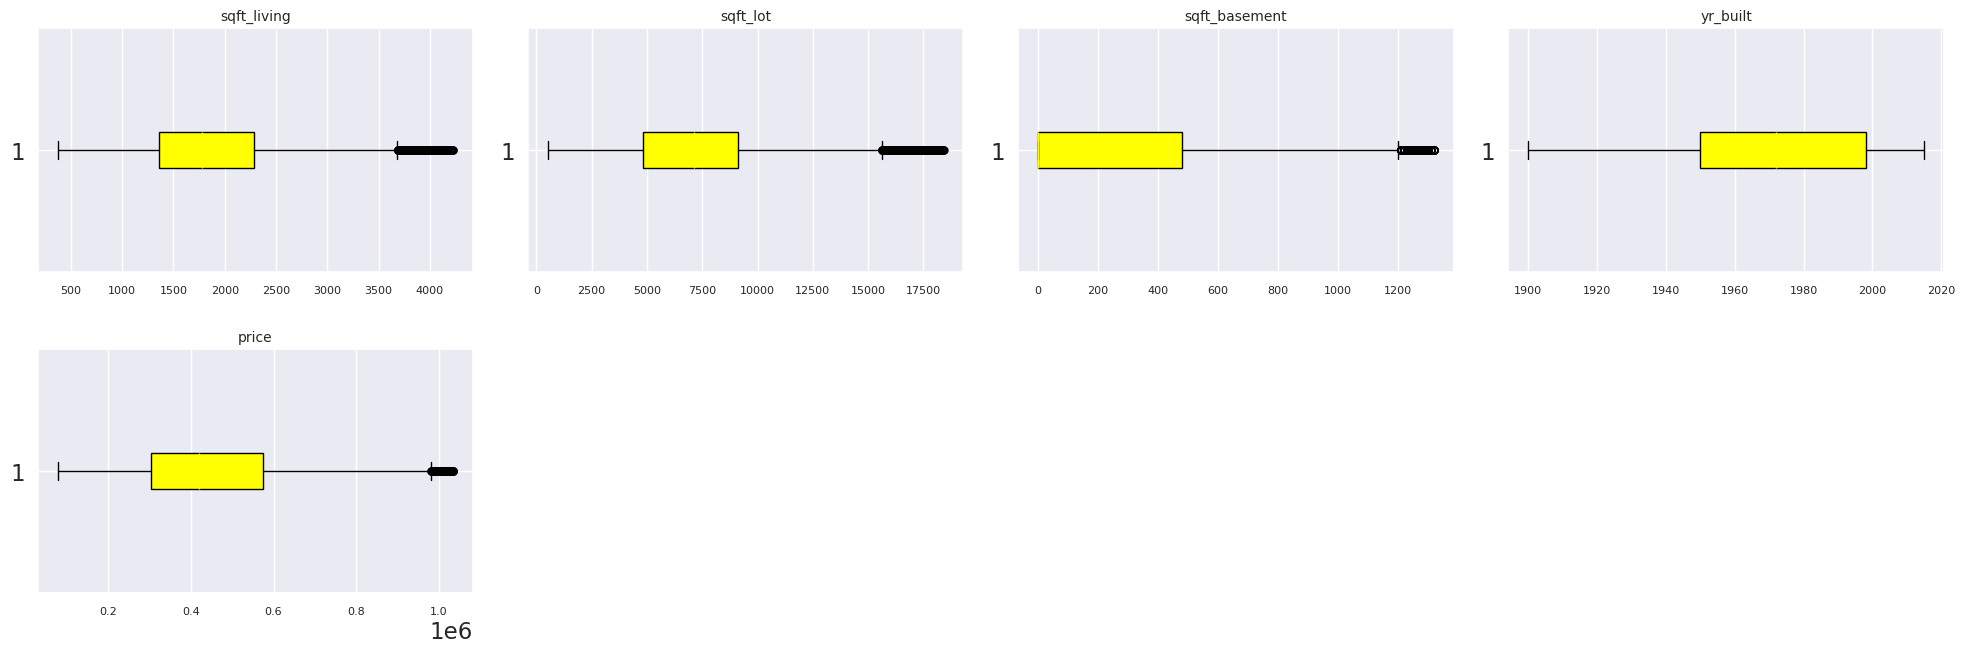

In [ ]:
color = '#FFFF00'

# grid size
nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df_reg.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df_reg.iloc[:, i].dropna().astype(int), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df_reg.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

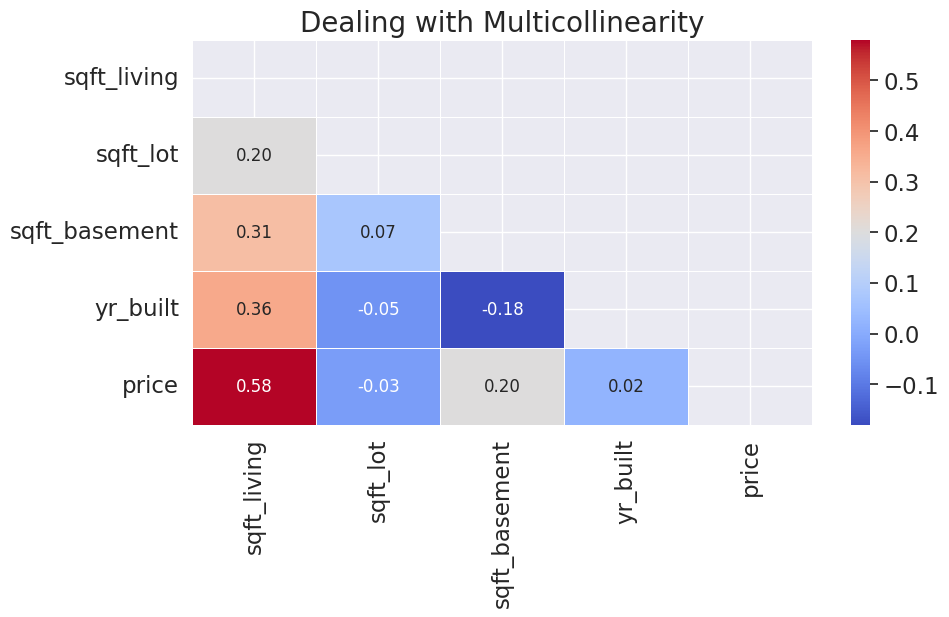

In [ ]:

num_corr = round(df_reg.corr(), 2)

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(10, 5))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()



In [ ]:
X = df_reg.drop('price', axis=1)
X = df_reg.drop(['price','yr_built','sqft_lot'],axis=1)
X_norm = get_normalized_X(df_reg)
y = df_reg["price"]
print(X.head(5))

   sqft_living  sqft_lot  sqft_basement  yr_built
0     0.209845  0.286688       0.000000  0.478261
1     0.569948  0.375657       0.303030  0.443478
2     0.103627  0.529787       0.000000  0.286957
3     0.411917  0.250363       0.689394  0.565217
4     0.339378  0.422488       0.000000  0.756522
   sqft_living  sqft_basement
0         1180              0
1         2570            400
2          770              0
3         1960            910
4         1680              0


In [ ]:
linear_regression_model(df.drop('price', axis=1), df['price'])

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.
R2 =  0.6996
RMSE =  208251.6999
MSE =   43368770522.5929
MAE =  127454.4037


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[0.6995926268843418, 208251.69992725845, 43368770522.5929, 127454.40369015443]

In [ ]:
linear_regression_model(X, y)

100% of our data: 17743.
70% for training data: 12420.
30% for test data: 5323.
R2 =  0.338
RMSE =  155983.1075
MSE =   24330729816.6507
MAE =  126824.5069


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[0.3380141187845166, 155983.10747209354, 24330729816.65068, 126824.50685155015]

In [ ]:
linear_regression_model(X_norm, y)

100% of our data: 17743.
70% for training data: 12420.
30% for test data: 5323.
R2 =  0.4114
RMSE =  147085.463
MSE =   21634133413.4436
MAE =  117603.8548


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[0.4113826021679421, 147085.46295757304, 21634133413.44359, 117603.85476396474]

## Lasso Regression - Imtiaz

> Add blockquote



In [ ]:
df_lasso = df.copy()

In [ ]:
df_lasso.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

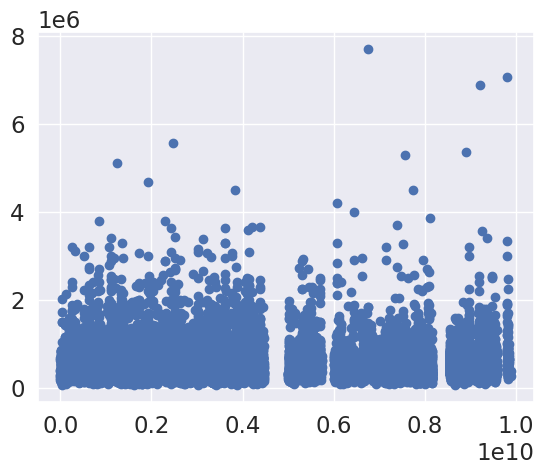

In [ ]:
plt.scatter(x='id', y='price', data=df_lasso)

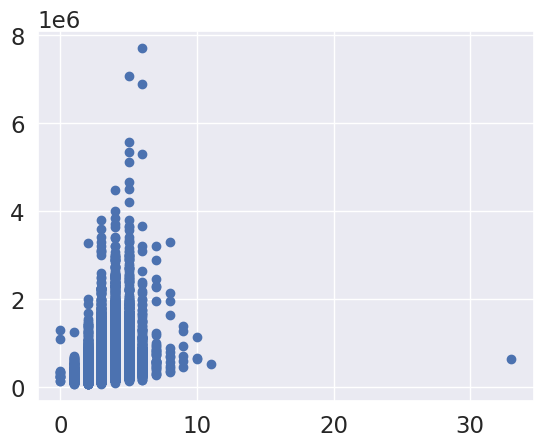

In [ ]:
plt.scatter(x='bedrooms', y='price', data=df_lasso)

In [ ]:
df_lasso.query('bedrooms> 9')
#1773100755, 627300145, 5566100170, 2402100895,  8812401450

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
8757,1773100755,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,520000.0
13314,627300145,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,1148000.0
15161,5566100170,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,650000.0
15870,2402100895,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000.0
19254,8812401450,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,660000.0


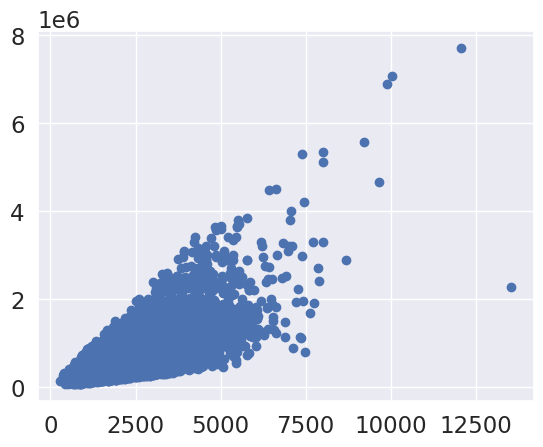

In [ ]:
plt.scatter(x='sqft_living', y='price', data=df_lasso)

In [ ]:
df_lasso.query('sqft_living> 9000')
#9808700762, 2470100110, 6762700020, 1924059029	, 9208900037, 1225069038

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
3914,9808700762,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,7062500.0
4411,2470100110,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,5570000.0
7252,6762700020,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000.0
8092,1924059029,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,4668000.0
9254,9208900037,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,6885000.0
12777,1225069038,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2280000.0


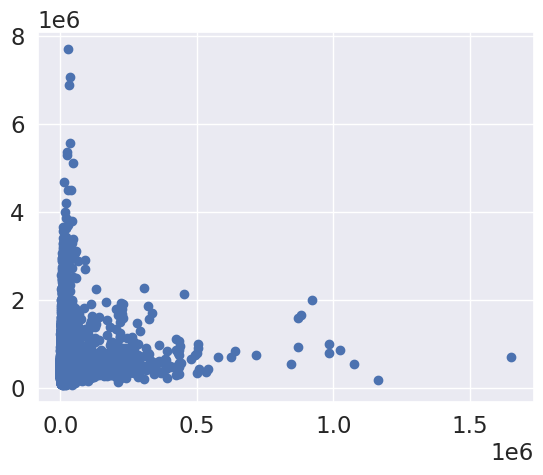

In [ ]:
plt.scatter(x='sqft_lot', y='price', data=df_lasso)

In [ ]:
df_lasso.query('sqft_lot > 900000')
#1020069017, 722069232, 3626079040, 2624089007, 2623069031, 2323089009, 3326079016

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
1719,1020069017,4,1.00,1300,1651359,1.0,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581,700000.0
3949,722069232,4,3.25,3770,982998,2.0,0,0,3,10,3770,0,1992,0,98058,47.4140,-122.087,2290,37141,998000.0
4441,3626079040,2,3.00,2560,982278,1.0,0,0,3,8,2560,0,2004,0,98014,47.6955,-121.861,1620,40946,790000.0
6691,2624089007,2,2.50,3900,920423,2.0,0,0,3,12,3900,0,2009,0,98065,47.5371,-121.756,2720,411962,1998000.0
7647,2623069031,5,3.25,3010,1074218,1.5,0,0,5,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825,542500.0
7769,2323089009,4,3.50,4030,1024068,2.0,0,0,3,10,4030,0,2006,0,98045,47.4619,-121.744,1830,11700,855000.0
17319,3326079016,2,1.00,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730,190000.0


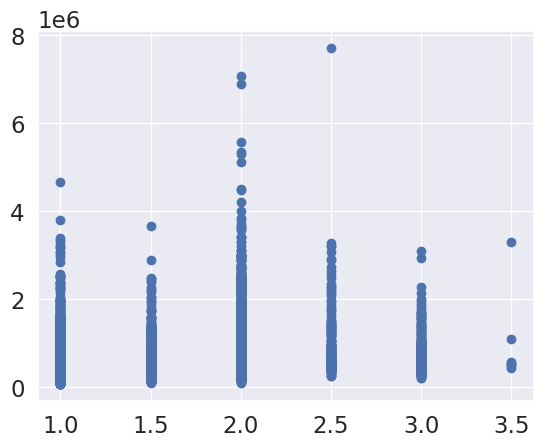

In [ ]:
plt.scatter(x='floors', y='price', data=df_lasso)

In [ ]:
df_lasso.query('floors == 3.5')
#6306400140, 	1972202010, 3180100023, 8673400177, 1702900664, 1346300150, 1972200426, 1972200428

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
875,6306400140,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,1095000.0
10077,1972202010,3,3.00,1440,1350,3.5,0,2,3,8,1440,0,2005,0,98103,47.6525,-122.345,1440,1350,435000.0
11594,3180100023,3,2.50,1760,1755,3.5,0,0,3,8,1760,0,1998,0,98105,47.6688,-122.279,1700,1721,544000.0
14885,8673400177,3,3.00,1730,1074,3.5,0,0,3,8,1730,0,2006,0,98107,47.6692,-122.392,1370,1185,525000.0
15424,1702900664,2,2.50,1730,1037,3.5,0,0,3,8,1730,0,2008,0,98118,47.5594,-122.285,1280,1026,479000.0
18477,1346300150,8,4.00,7710,11750,3.5,0,0,5,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325,3300000.0
20308,1972200426,2,2.75,1310,1268,3.5,0,0,3,8,1310,0,2007,0,98103,47.6534,-122.355,1350,1288,525000.0
20772,1972200428,3,2.50,1400,1312,3.5,0,0,3,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312,563500.0


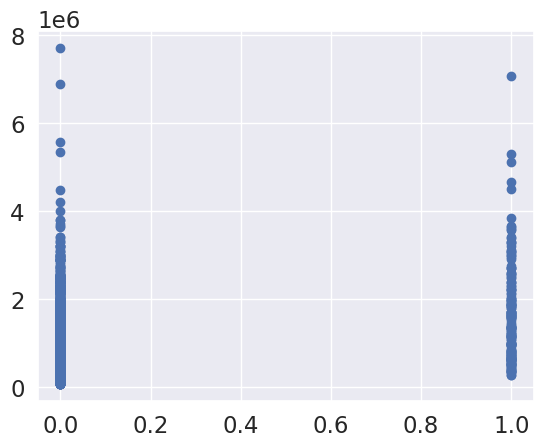

In [ ]:
plt.scatter(x='waterfront', y='price', data=df_lasso)

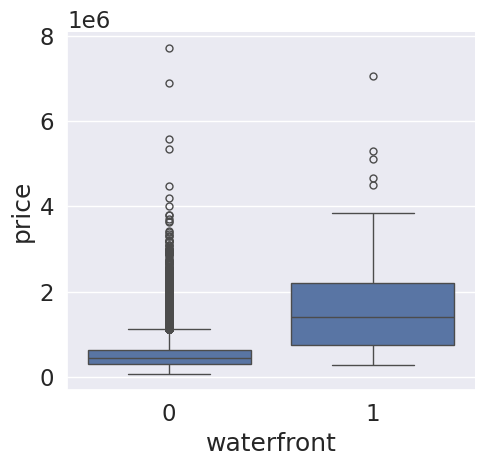

In [ ]:
sns.catplot(data=df_lasso, x="waterfront", y="price", kind="box")

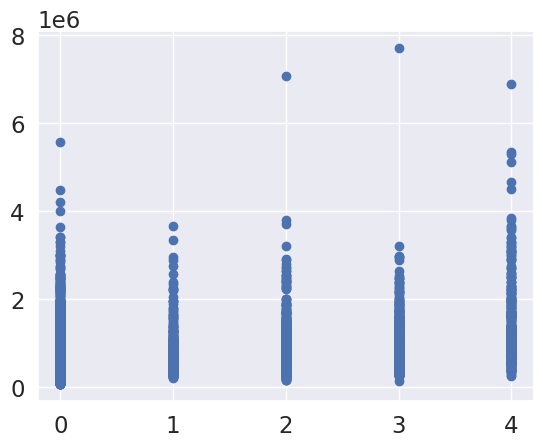

In [ ]:
plt.scatter(x='view', y='price', data=df_lasso)

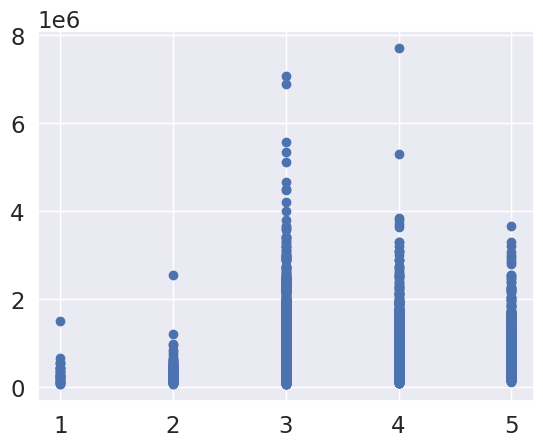

In [ ]:
plt.scatter(x='condition', y='price', data=df_lasso)

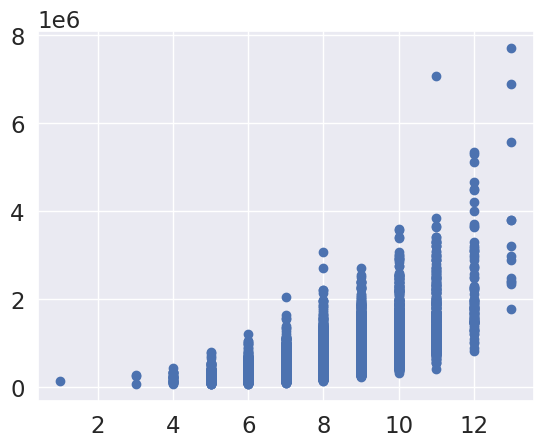

In [ ]:
plt.scatter(x='grade', y='price', data=df_lasso)

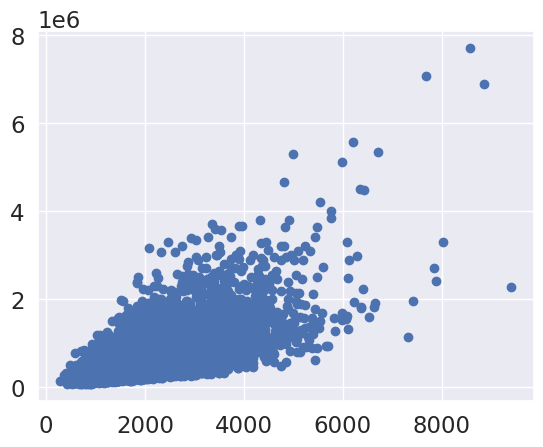

In [ ]:
plt.scatter(x='sqft_above', y='price', data=df_lasso)

In [ ]:
df_lasso.query('sqft_above > 7000')
#9808700762, 6762700020, 9208900037, 8835800350, 1225069038, 2426039123, 6072800246, 3023069166, 2524069078

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
3914,9808700762,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,7062500.0
7252,6762700020,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000.0
9254,9208900037,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,6885000.0
11871,8835800350,4,3.25,7420,167869,2.0,0,3,3,12,7420,0,2002,0,98045,47.4548,-121.764,5610,169549,1950000.0
12777,1225069038,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2280000.0
13411,2426039123,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362,2740,10761,2415000.0
18302,6072800246,5,6.25,8020,21738,2.0,0,0,3,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969,3300000.0
18594,3023069166,5,4.00,7320,217800,2.0,0,0,3,11,7320,0,1992,0,98058,47.4473,-122.086,3270,34500,1135250.0
19858,2524069078,4,4.00,7850,89651,2.0,0,0,3,12,7850,0,2006,0,98027,47.5406,-121.982,6210,95832,2700000.0


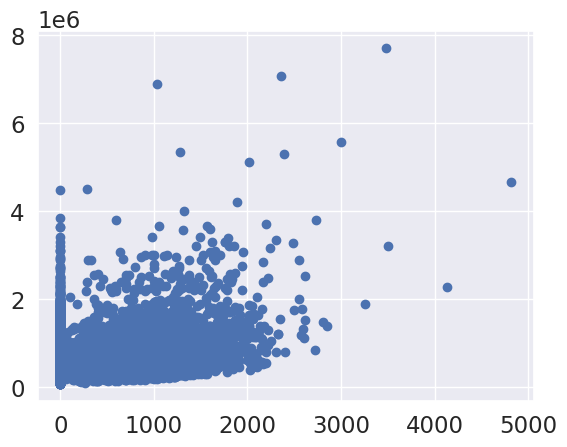

In [ ]:
plt.scatter(x='sqft_basement', y='price', data=df_lasso)

In [ ]:
df_lasso.query('sqft_basement > 3000')
#6762700020	, 1924059029, 7767000060, 1225069038, 624069108

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7252,6762700020,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000.0
8092,1924059029,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,4668000.0
10085,7767000060,5,4.25,6510,16471,2.0,0,3,4,11,3250,3260,1980,0,98040,47.5758,-122.242,4480,16471,1900000.0
12777,1225069038,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2280000.0
15482,624069108,4,3.25,7000,28206,1.0,1,4,4,12,3500,3500,1991,0,98075,47.5928,-122.086,4913,14663,3200000.0


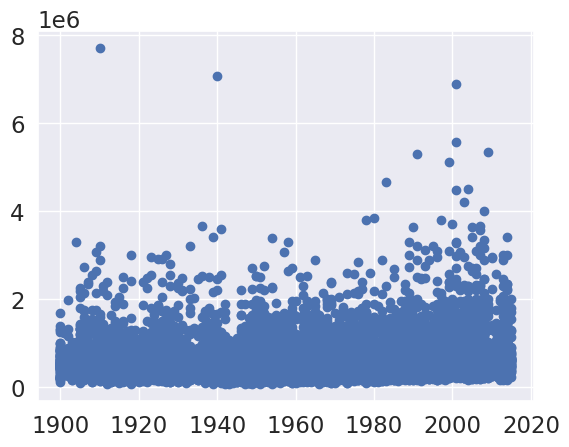

In [ ]:
plt.scatter(x='yr_built', y='price', data=df_lasso)

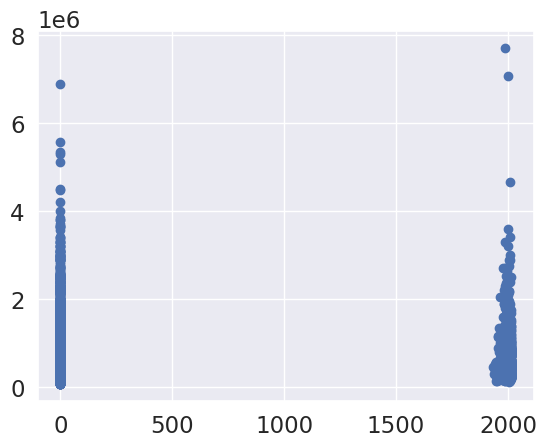

In [ ]:
plt.scatter(x='yr_renovated', y='price', data=df_lasso)

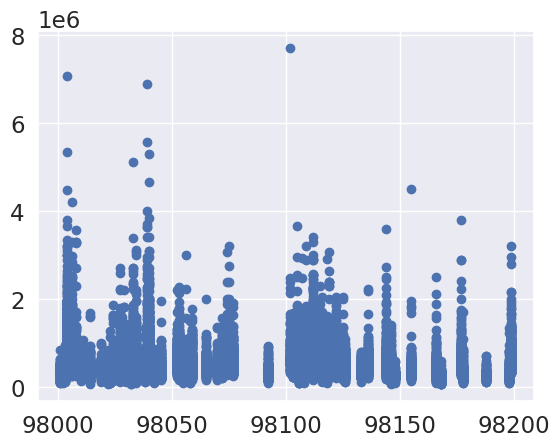

In [ ]:
plt.scatter(x='zipcode', y='price', data=df_lasso)

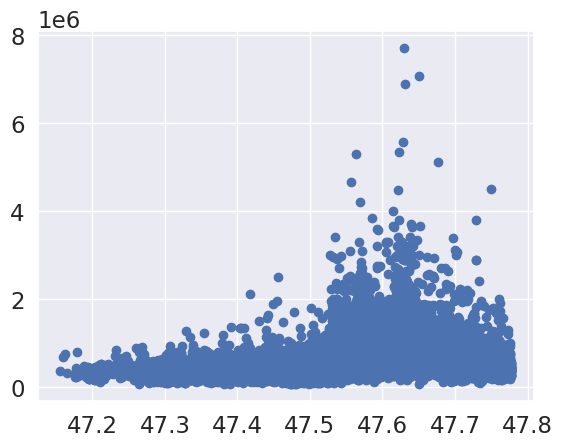

In [ ]:
plt.scatter(x='lat', y='price', data=df_lasso)

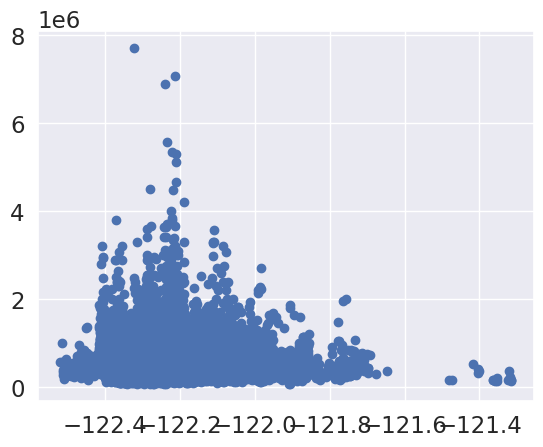

In [ ]:
plt.scatter(x='long', y='price', data=df_lasso)

In [ ]:
df_lasso.query('long > -121.4')
#5061300030	, 8649401270, 1437500015, 5062300280, 7805600070, 8649401000, 1437500035, 8649400410, 8649400790, 2626119028, 2626119062

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2589,5061300030,2,1.50,980,5000,2.0,0,0,3,7,980,0,1922,2003,98014,47.7076,-121.359,1040,5000,134000.0
2927,8649401270,1,1.00,780,10235,1.5,0,0,3,6,780,0,1989,0,98014,47.7130,-121.315,930,10165,167000.0
4203,1437500015,3,0.75,490,38500,1.5,0,0,4,5,490,0,1959,0,98014,47.7112,-121.315,800,18297,150000.0
6089,5062300280,3,1.00,890,6488,1.5,0,0,3,5,890,0,1928,0,98014,47.7087,-121.352,1330,16250,150000.0
10095,7805600070,2,1.75,1320,13052,1.5,0,0,3,7,1320,0,1980,0,98014,47.7120,-121.352,1320,13052,200000.0
10898,8649401000,2,1.75,1070,9750,1.5,0,0,3,7,1070,0,1995,0,98014,47.7131,-121.319,970,9750,241000.0
13072,1437500035,2,1.00,1010,43056,1.5,0,0,3,5,1010,0,1990,0,98014,47.7105,-121.316,830,18297,155000.0
13249,8649400410,3,1.75,2140,13598,1.5,0,0,4,7,1620,520,1970,0,98014,47.7139,-121.321,930,10150,375000.0
14615,8649400790,3,1.00,1340,18552,1.5,0,0,4,5,1340,0,1935,0,98014,47.7129,-121.325,960,15141,160000.0
16941,2626119028,3,1.00,1140,3240,1.5,0,0,4,6,1140,0,1910,0,98014,47.7093,-121.364,1140,4700,160000.0


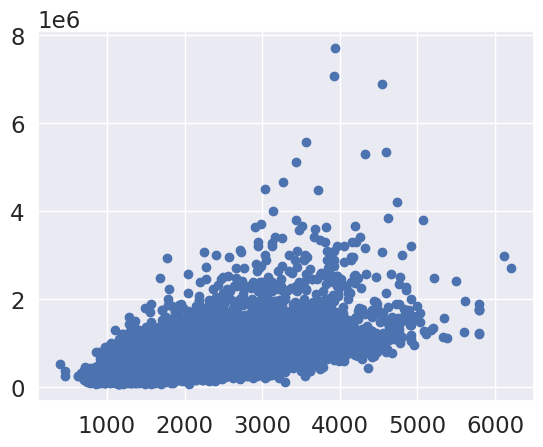

In [ ]:
plt.scatter(x='sqft_living15', y='price', data=df_lasso)

In [ ]:
df_lasso.query('sqft_living15 > 6000')
#3303850390, 2524069078

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
10373,3303850390,5,5.5,7400,18898,2.0,0,3,3,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442,2983000.0
19858,2524069078,4,4.0,7850,89651,2.0,0,0,3,12,7850,0,2006,0,98027,47.5406,-121.982,6210,95832,2700000.0


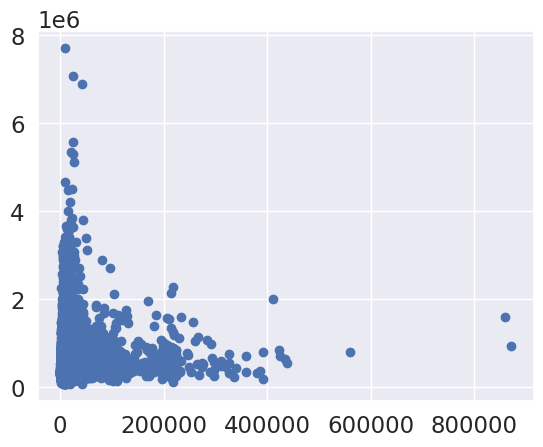

In [ ]:
plt.scatter(x='sqft_lot15', y='price', data=df_lasso)

In [ ]:
df_lasso.query('sqft_lot15 > 800000')
#225079036, 1125079111

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
9714,225079036,4,4.0,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014,47.676,-121.882,3420,871200,937500.0
20452,1125079111,4,5.5,6530,871200,2.0,0,2,3,11,6530,0,2008,0,98014,47.664,-121.878,1280,858132,1600000.0


In [ ]:
values = [225079036, 1125079111,3303850390, 2524069078, 5061300030	, 8649401270, 1437500015, 5062300280, 7805600070, 8649401000, 1437500035, 8649400410, 8649400790, 2626119028, 2626119062,6762700020	, 1924059029, 7767000060, 1225069038, 624069108,9808700762, 6762700020, 9208900037, 8835800350, 1225069038, 2426039123, 6072800246, 3023069166, 2524069078, 6306400140, 	1972202010, 3180100023, 8673400177, 1702900664, 1346300150, 1972200426, 1972200428,  1020069017, 722069232, 3626079040, 2624089007, 2623069031, 2323089009, 3326079016,  9808700762, 2470100110, 6762700020, 1924059029	, 9208900037, 1225069038, 1773100755, 627300145, 5566100170, 2402100895,  8812401450,   ]

In [ ]:
df_lasso = df_lasso[df_lasso.id.isin(values) == False]

<Axes: >

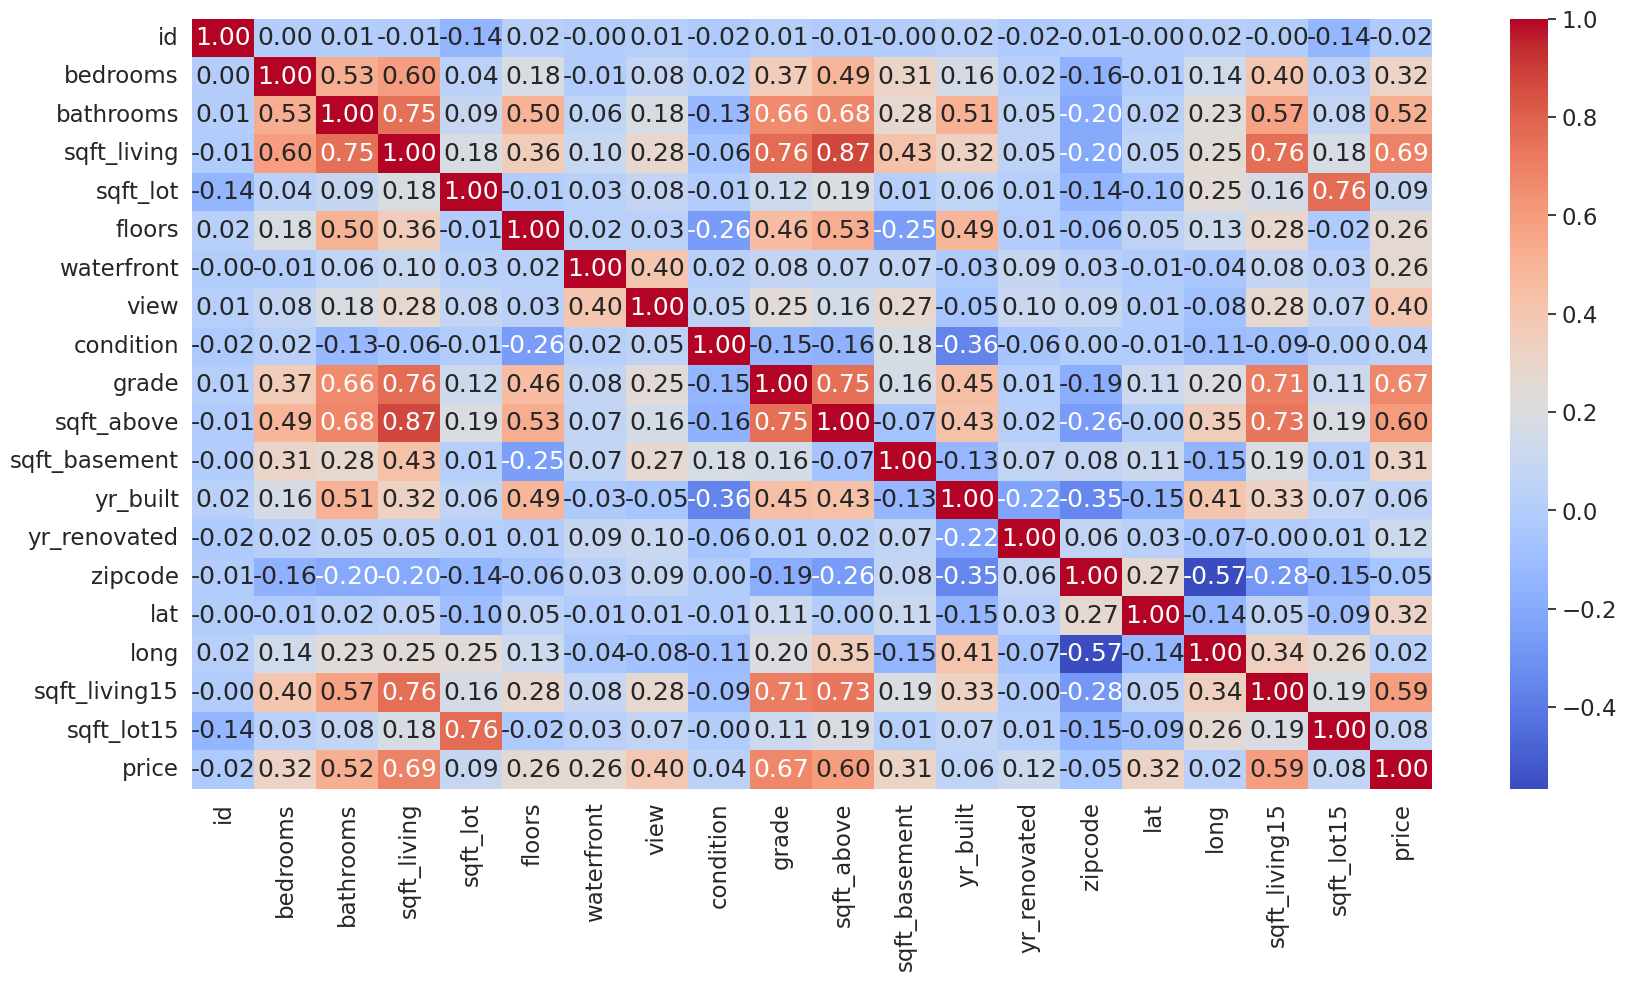

In [ ]:
correlation_matrix = df_lasso.corr(numeric_only=True)
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
  ### Seeing the correlation, dropping the less correlated columns

df_lasso = df_lasso.drop("sqft_lot", axis=1)
df_lasso = df_lasso.drop("long", axis=1)
df_lasso = df_lasso.drop("zipcode", axis=1)
df_lasso = df_lasso.drop("yr_built", axis=1)
df_lasso = df_lasso.drop("yr_renovated", axis=1)
df_lasso = df_lasso.drop("condition", axis=1)
df_lasso = df_lasso.drop("sqft_lot15", axis=1)
df_lasso = df_lasso.drop("id", axis =1)

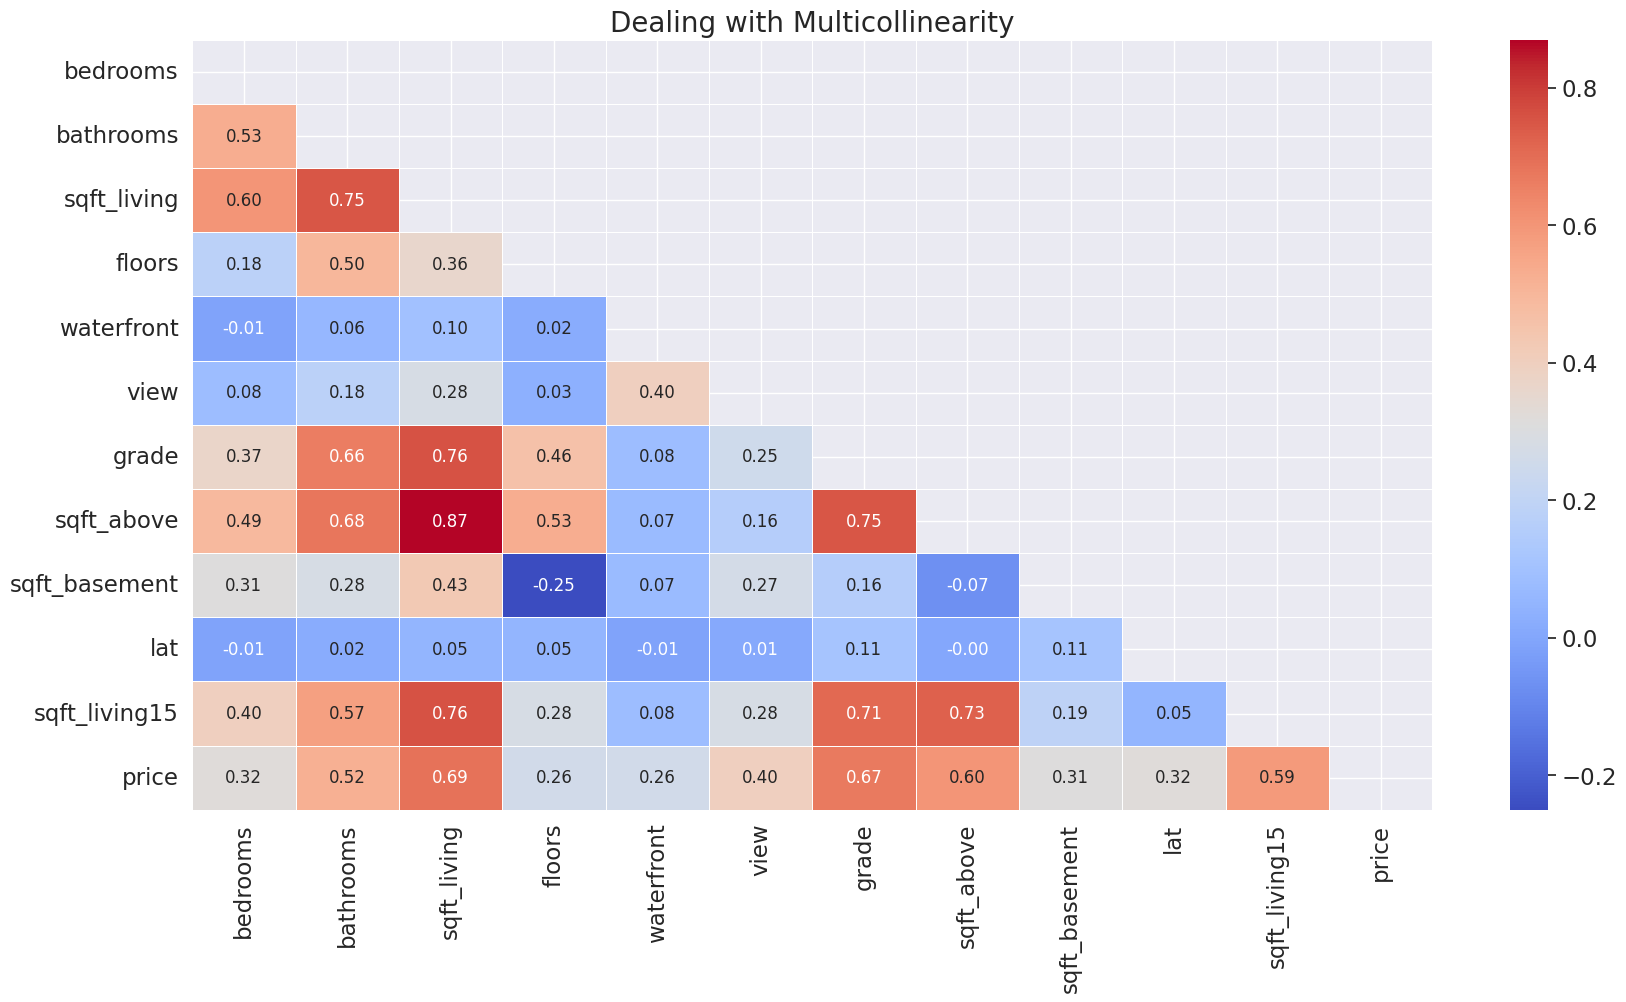

In [ ]:
num_corr = round(df_lasso.corr(), 2)  # Use .corr() to calculate the correlation matrix

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True  # Optional, to hide the upper triangle of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)  # Increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax)  # Round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20)  # Add title
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R² Score: 0.6614
RMSE: 209892.5724
MAE: 133048.6998


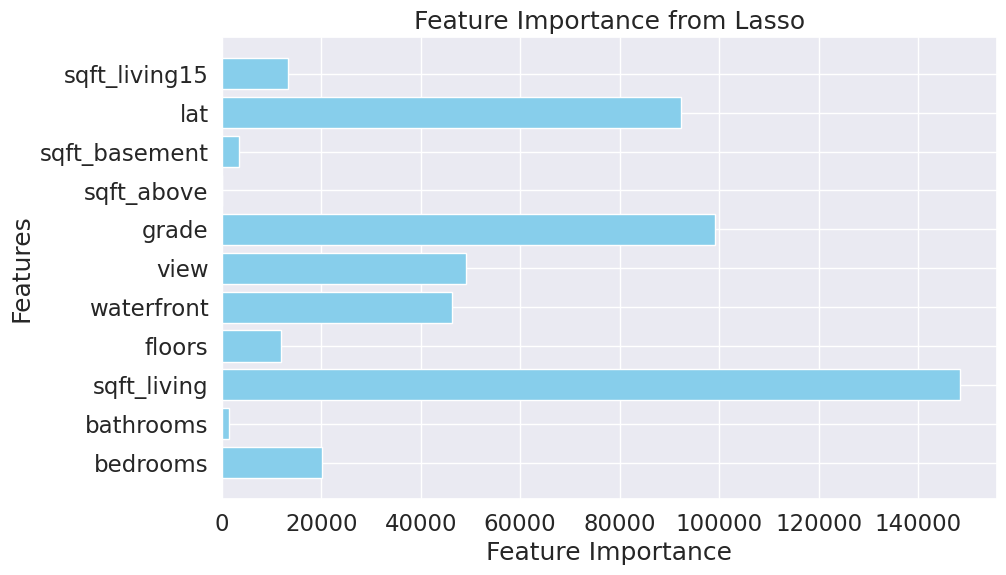

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define the Lasso model pipeline
def lasso_pipeline(df_lasso, target_column):
    # Split data into features (X) and target (y)
    X = df_lasso.drop(columns=[target_column])
    y = df_lasso[target_column]

    # Standardize features and apply Lasso with cross-validation
    lasso_pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('lasso', LassoCV(cv=5, random_state=42))  # Lasso with cross-validation
    ])

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit the pipeline
    lasso_pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = lasso_pipeline.predict(X_test)

    # Evaluate model
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation metrics
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Feature importance from Lasso
    feature_importance = np.abs(lasso_pipeline.named_steps['lasso'].coef_)
    feature_names = X.columns

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importance, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance from Lasso')
    plt.show()

    return lasso_pipeline, r2, rmse, mae

# Run Lasso model pipeline
lasso_model, lasso_r2, lasso_rmse, lasso_mae = lasso_pipeline(df_lasso, target_column="price")


## Ridge Model - Susana

In [ ]:
## Ridge Model Susana

In [ ]:
df_ridge = df.copy() # creating a copy of original dataset to work on without altering the original

In [ ]:
for col in df_ridge.columns:
    n = len(df_ridge[col].value_counts().unique())  # Check unique value counts for each columns (help figure out if categorical or continiuous columns)
    print(col, n)

id 3
bedrooms 11
bathrooms 24
sqft_living 122
sqft_lot 68
floors 6
waterfront 2
view 5
condition 5
grade 12
sqft_above 144
sqft_basement 86
yr_built 100
yr_renovated 26
zipcode 66
lat 17
long 101
sqft_living15 133
sqft_lot15 74
price 107


In [ ]:
#Dropping columns in df - some because of weak correlation, some because there is an overalp in information and some irrelevant eg. long does not help
df_ridge = df_ridge.drop("zipcode", axis=1)
df_ridge = df_ridge.drop("yr_built", axis=1)
df_ridge = df_ridge.drop("long", axis=1)
df_ridge = df_ridge.drop("sqft_above", axis=1)
df_ridge = df_ridge.drop("sqft_living15", axis=1)
df_ridge = df_ridge.drop("sqft_lot15", axis=1)
df_ridge = df_ridge.drop("lat", axis = 1)
df_ridge = df_ridge.drop("condition", axis = 1)
df_ridge = df_ridge.drop("sqft_lot", axis=1)

In [ ]:
# Taken inspiration from Edu - Removing outliers using interquarile range methods because outliers can distort predictions and eliminating them helps the model learn from more "normal" data - no extreme cases
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
# Deperate X_ridge (indepeendent) from target (y_ridge) this helps prep data for training
for col in df_ridge.columns:
    if df_ridge[col].dtype != 'object':
        df_ridge = remove_outliers(df_ridge, col)

In [ ]:
#Quick check of columns we are reviewing
df_ridge.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'grade', 'sqft_basement', 'yr_renovated', 'price'],
      dtype='object')

In [ ]:
#Prepare the independenet variable to the target
X_ridge = df_ridge.drop('price', axis=1) #features
y_ridge = df_ridge['price'] #target

In [ ]:
##Splitting data training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_ridge, y_ridge, test_size=0.3, random_state=42)

In [ ]:
#I learned that in the ridge model, regression needs features on the same scale because of coefficients. Basically all features have mean of 0 and SD of 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Training the model using the newly implemented scaled training data
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
#Makes the model use the trained model to predice for trainig data and test draina -
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

In [ ]:
#Internet helped here but
print("Ridge Regression - Training Performance:")
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"MSE (Mean Squared Error): {round(train_mse, 4)}")
print(f"RMSE (Root Mean Squared Error): {round(train_rmse, 4)}")
print(f"MAE (Mean Absolute Error): {round(train_mae, 4)}")
print(f"R² (Explained Variance): {round(train_r2, 4)}")

# Testing Performance
print("\nRidge Regression - Testing Performance:")
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"MSE (Mean Squared Error): {round(test_mse, 4)}")
print(f"RMSE (Root Mean Squared Error): {round(test_rmse, 4)}")
print(f"MAE (Mean Absolute Error): {round(test_mae, 4)}")
print(f"R² (Explained Variance): {round(test_r2, 4)}")


Ridge Regression - Training Performance:
MSE (Mean Squared Error): 18438820306.8278
RMSE (Root Mean Squared Error): 135789.6178
MAE (Mean Absolute Error): 109205.7511
R² (Explained Variance): 0.3584

Ridge Regression - Testing Performance:
MSE (Mean Squared Error): 17623965752.3333
RMSE (Root Mean Squared Error): 132755.2852
MAE (Mean Absolute Error): 106984.5694
R² (Explained Variance): 0.3768


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#The result is not satisfactoy, and the prediciotns are off by a very large amount.

In [ ]:
#Internet help - Analyse the "thinking" of the model - basically how much each feature contributes to predict the price. It also ranks the features - code from internet
coefficients = pd.DataFrame({
    'Feature': X_ridge.columns,
    'Coefficient': ridge.coef_
}).sort_values(by='Coefficient', ascending=False)


In [ ]:
ridge_model(X, y)

100% of our data: 17743.
70% for training data: 12420.
30% for test data: 5323.
R2 =  0.338
RMSE =  155983.1075
MSE =   24330729816.6993
MAE =  126824.5069


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[0.33801411878319265, 155983.1074722495, 24330729816.69934, 126824.5068521822]

In [ ]:
ridge_model(X_norm, y)

100% of our data: 17743.
70% for training data: 12420.
30% for test data: 5323.
R2 =  0.4113
RMSE =  147093.3342
MSE =   21636448970.615
MAE =  117629.2271


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[0.41131960092769326,
 147093.33421543948,
 21636448970.61498,
 117629.22709343847]

In [ ]:
#The results are basically the same meaning scaling did little to nothing to the rifge model

## Decision Tree Model


In [ ]:
df_dt = df.copy() # Caique

In [ ]:
df_dt = df_dt[~df_dt.duplicated()] # duplicates removed

In [ ]:
dt = df_dt.drop([
    'id', # uniform and unnecessary
    'sqft_above',
    'zipcode' # multicolinearity and redundant
], axis=1)

In [ ]:
dt.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [ ]:
dt = remove_outliers(dt, 'bedrooms')
# dt = remove_outliers(dt, 'sqft_living')
# dt = remove_outliers(dt, 'sqft_lot')
# dt = remove_outliers(dt, 'sqft_basement')
# dt = remove_outliers(dt, 'sqft_living15')
# dt = remove_outliers(dt, 'sqft_lot15')

In [ ]:
dt

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,47.6993,-122.346,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,47.5107,-122.362,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,47.5944,-122.299,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,47.5345,-122.069,1410,1287,400000.0


In [ ]:
# decision trees work better with binary code, so we might want to transform a few columns to binary and see what happens
dt['view'] = dt['view'].apply(lambda x: 1 if x != 0 else 0) # 0 : not visited 1: visited
dt['yr_renovated'] = dt['yr_renovated'].apply(lambda x: 1 if x != 0 else 0) # 0: not renovated 1: renovated

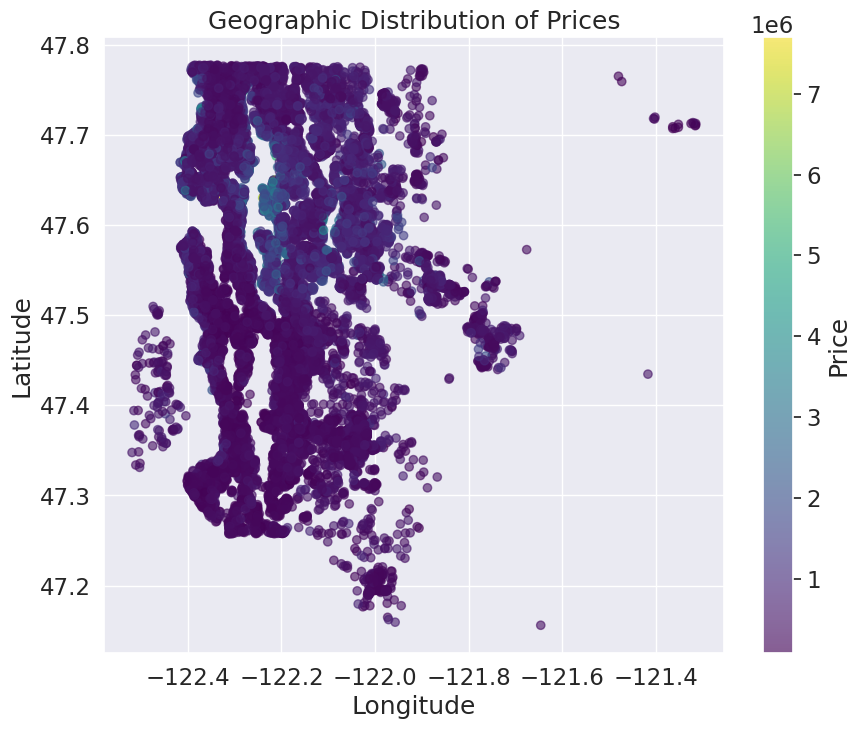

In [ ]:
# checking correlation between lat/long to house pricing

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['long'], df['lat'], c=df['price'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Prices')
plt.show()

In [ ]:
X_dt = dt.drop('price', axis=1)
y_dt = dt['price']

In [ ]:
decision_tree_model(X_dt, y_dt, 0.1)

100% of our data: 21064.
90.0% for training data: 18957.
10.0% for test data: 2107.
R2 =  0.7591
RMSE =  160789.678
MSE =   25853320546.2368
MAE =  93172.1391


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[0.7590515414157226, 160789.67798411945, 25853320546.236828, 93172.13906027528]

In [ ]:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size=0.1, random_state=42)

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_dt_train, y_dt_train)

DecisionTreeRegressor()

In [ ]:
caique_pred = tree.predict(X_dt_test)
importance = tree.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_dt.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [ ]:
caique_dt = pd.DataFrame({
    'ground_truth' : y_dt_test,
    'prediction' : caique_pred,
    'error' : y_dt_test - caique_pred
})

In [ ]:
caique_dt.describe().round(2)

,ground_truth,prediction,error
count,2107.00,2107.00,2107.00
mean,520828.96,519032.52,1796.44
std,327641.70,314279.17,166408.93
min,78000.00,83000.00,-1395000.00
25%,319000.00,318100.00,-55025.00
50%,449400.00,445000.00,0.00
75%,625000.00,625000.00,54555.00
max,3850000.00,2795000.00,2237500.00


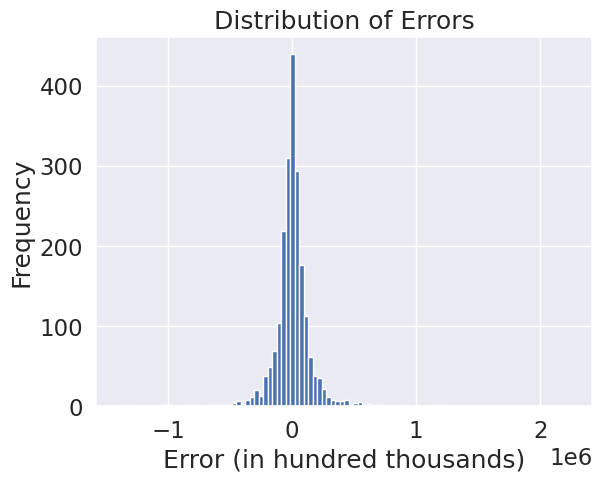

In [ ]:
caique_dt.error.hist(bins=100)
plt.title('Distribution of Errors')
plt.xlabel('Error (in hundred thousands)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
feature_importance

,Feature,Importance
8,grade,0.349828
2,sqft_living,0.248317
12,lat,0.171614
13,long,0.080955
5,waterfront,0.036890
14,sqft_living15,0.031718
15,sqft_lot15,0.018643
10,yr_built,0.017735
3,sqft_lot,0.015004
9,sqft_basement,0.007922


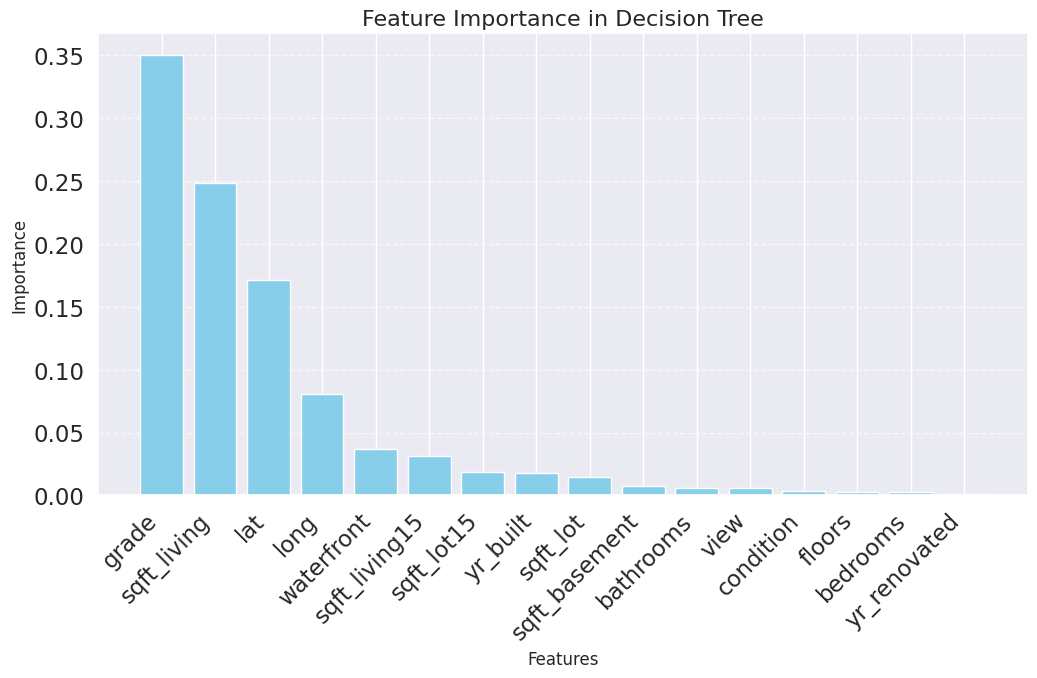

In [ ]:
# Plot the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importance in Decision Tree', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()